In [2]:
!pip install mlrose-hiive

     |████████████████████████████████| 51kB 2.4MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.1.3-cp36-none-any.whl size=96601 sha256=a4a41d28907d4663a4be839d8fa1076851e48b040b9b4b0f99921fd273c2273a
  Stored in directory: /root/.cache/pip/wheels/ee/ef/8b/941402c2014649279f68a1ed4a37b4d15142dfb9c7e4a6b7ac
Successfully built mlrose-hiive


In [2]:
from mlrose_hiive import NeuralNetwork
from sklearn.metrics import accuracy_score
import csv
import pandas as pd
import time
import json

In [4]:
def run_neural_network_ga(X_train, y_train, X_test, y_test):
  hidden_nodes = [100, 50, 100]
  
  results = {}
  for mp in [0.1, 0.2, 0.3, 0.4, 0.5]:
    print("MP", mp)
    start = time.time()
    model = NeuralNetwork(hidden_nodes=hidden_nodes, algorithm='genetic_alg', mutation_prob=mp,
                          curve=True, max_iters=100)
    model.fit(X_train, y_train)
    end = time.time()
    y_act = model.predict(X_test)
    results[mp] = {
        'time': end-start,
        'loss': model.loss, 
        'accuracy': accuracy_score(y_act, y_test),
        'curve': model.fitness_curve.tolist()
    }
    with open("GA_MP.json", "w+") as f:
      json.dump(results, f, indent=4)


In [5]:
from scipy.io.arff import loadarff 
from sklearn.model_selection import train_test_split

raw_data = loadarff('Training Dataset.arff')
ph_data = pd.DataFrame(raw_data[0])

for var in ph_data.columns.values:
    ph_data[var] = pd.Categorical(ph_data[var])
    ph_data[var] = ph_data[var].cat.codes


y = ph_data.Result.values
X = ph_data.drop(['Result'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

run_neural_network_ga(X_train, y_train, X_test, y_test)

MP 0.1
MP 0.2
MP 0.3
MP 0.4
MP 0.5


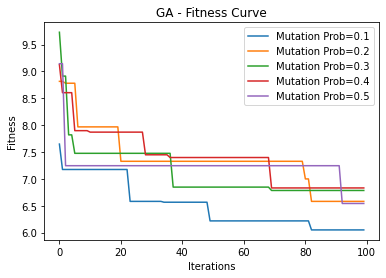

In [8]:
import matplotlib.pyplot as plt

results = None        
with open("GA_MP.json") as f:
    results = json.load(f)

fig, ax = plt.subplots()
ax.set_title("GA - Fitness Curve")
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")
for restart, stats in results.items():
    ax.plot(stats['curve'], label="Mutation Prob={}".format(restart))

plt.legend(loc='best')
plt.savefig("GA_MP_Curve.png")


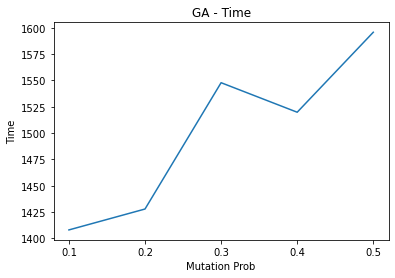

In [5]:
results = None        
with open("GA_MP.json") as f:
    results = json.load(f)

fig, ax = plt.subplots()
ax.set_title("GA - Time")
ax.set_xlabel("Mutation Prob")
ax.set_ylabel("Time")
pops = []
times = []
for pop, stats in results.items():
    pops.append(pop)
    times.append(stats['time'])    
ax.plot(pops, times)

plt.savefig("GA_MP_Curve_time.png")

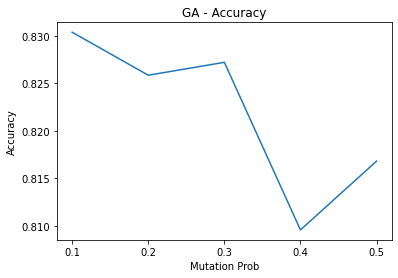

In [6]:
results = None        
with open("GA_MP.json") as f:
    results = json.load(f)

fig, ax = plt.subplots()
ax.set_title("GA - Accuracy")
ax.set_xlabel("Mutation Prob")
ax.set_ylabel("Accuracy")
decays = []
times = []
for decay, stats in results.items():
    decays.append(decay)
    times.append(stats['accuracy'])    
ax.plot(decays, times)

plt.savefig("GA_MP_Curve_acc.png")

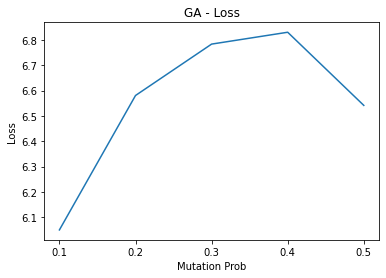

In [7]:
results = None        
with open("GA_MP.json") as f:
    results = json.load(f)

fig, ax = plt.subplots()
ax.set_title("GA - Loss")
ax.set_xlabel("Mutation Prob")
ax.set_ylabel("Loss")
pops = []
times = []
for pop, stats in results.items():
    pops.append(pop)
    times.append(stats['loss'])    
ax.plot(pops, times)

plt.savefig("GA_MP_Curve_loss.png")